In [5]:
from ultralytics import YOLO
import numpy as np
import torch
from PIL import Image
import requests
from io import BytesIO
import cv2

In [3]:
def drawboxes(image):
    results = model.predict(image)
    result = results[0]
    box = result.boxes[0]
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        print("---")
    return result

In [14]:
!nvidia-smi

Sat Dec  2 16:05:05 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.17                 Driver Version: 546.17       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   57C    P8               7W /  90W |    490MiB /  6144MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [15]:
import sys
print("Python version:", sys.version)

Python version: 3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]


In [16]:
torch.cuda.empty_cache()

In [17]:
torch.cuda.is_available()

True

In [ ]:
model.train(data="data.yaml", epochs=50)

Ultralytics YOLOv8.0.221 🚀 Python-3.10.7 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscri

train: Scanning E:\studia\2sem\glebokie sieci\train\labels.cache... 21203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21203/21203 [00:00<?, ?it/s]
val: Scanning E:\studia\2sem\glebokie sieci\valid\labels.cache... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.35G      1.718      3.882      1.345         20        640: 100%|██████████| 1326/1326 [04:19<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


                   all       2020       8080       0.19      0.553      0.224      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.38G      1.383      2.294      1.144         10        640: 100%|██████████| 1326/1326 [04:07<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  3.00it/s]


                   all       2020       8080      0.674      0.763      0.793      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.37G      1.349      1.604      1.129         22        640: 100%|██████████| 1326/1326 [04:08<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:20<00:00,  3.11it/s]


                   all       2020       8080      0.919      0.937      0.981      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.36G      1.327      1.156       1.12          9        640: 100%|██████████| 1326/1326 [04:12<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:20<00:00,  3.16it/s]

                   all       2020       8080      0.982      0.987      0.994      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.37G      1.298     0.9298      1.107         16        640: 100%|██████████| 1326/1326 [04:06<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.24it/s]

                   all       2020       8080      0.992      0.994      0.995      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.35G      1.284     0.8281      1.096         10        640: 100%|██████████| 1326/1326 [04:09<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:20<00:00,  3.10it/s]


                   all       2020       8080      0.995      0.997      0.995      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.35G      1.263     0.7616      1.087         25        640: 100%|██████████| 1326/1326 [04:14<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:23<00:00,  2.68it/s]


                   all       2020       8080      0.996      0.998      0.995       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.35G      1.257     0.7257      1.085         12        640: 100%|██████████| 1326/1326 [04:31<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:23<00:00,  2.78it/s]


                   all       2020       8080      0.996      0.997      0.995      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.36G      1.248     0.6999      1.077         11        640: 100%|██████████| 1326/1326 [04:27<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]


                   all       2020       8080      0.997      0.998      0.995      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.35G      1.234     0.6763      1.072         26        640: 100%|██████████| 1326/1326 [04:18<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:22<00:00,  2.83it/s]

                   all       2020       8080      0.998      0.999      0.995      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.36G      1.222     0.6569      1.066         11        640: 100%|██████████| 1326/1326 [04:23<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:22<00:00,  2.87it/s]


                   all       2020       8080      0.998          1      0.995      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.35G      1.213     0.6445      1.061         15        640: 100%|██████████| 1326/1326 [04:21<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:22<00:00,  2.82it/s]

                   all       2020       8080      0.998          1      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.37G      1.201     0.6281      1.056         20        640: 100%|██████████| 1326/1326 [04:20<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:22<00:00,  2.88it/s]

                   all       2020       8080      0.999      0.999      0.995      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.36G      1.201     0.6213      1.053         25        640: 100%|██████████| 1326/1326 [04:13<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  2.95it/s]

                   all       2020       8080      0.998      0.999      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.35G      1.188     0.6053       1.05         29        640: 100%|██████████| 1326/1326 [04:14<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]


                   all       2020       8080      0.999      0.999      0.995      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.36G      1.188     0.6022      1.049         24        640: 100%|██████████| 1326/1326 [04:13<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  3.00it/s]

                   all       2020       8080      0.998          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.36G       1.18     0.5943      1.046         12        640: 100%|██████████| 1326/1326 [04:17<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:22<00:00,  2.84it/s]


                   all       2020       8080      0.999          1      0.995      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.36G      1.178     0.5867      1.044         24        640: 100%|██████████| 1326/1326 [04:18<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]


                   all       2020       8080      0.999          1      0.995      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.37G      1.173     0.5768      1.043         18        640: 100%|██████████| 1326/1326 [04:11<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]

                   all       2020       8080      0.999          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.36G      1.165     0.5709      1.037         20        640: 100%|██████████| 1326/1326 [04:11<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]

                   all       2020       8080      0.999          1      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.36G      1.165     0.5698       1.04         34        640: 100%|██████████| 1326/1326 [04:12<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:22<00:00,  2.84it/s]

                   all       2020       8080      0.999          1      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.35G      1.157     0.5615      1.034         35        640: 100%|██████████| 1326/1326 [04:12<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]

                   all       2020       8080      0.999          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.37G      1.153     0.5573      1.034         16        640: 100%|██████████| 1326/1326 [04:13<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]


                   all       2020       8080      0.999          1      0.995      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.35G      1.152     0.5504      1.033         19        640: 100%|██████████| 1326/1326 [04:12<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  2.97it/s]

                   all       2020       8080      0.999          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.36G      1.146     0.5456       1.03         16        640: 100%|██████████| 1326/1326 [04:12<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]

                   all       2020       8080      0.999          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.36G      1.139     0.5419      1.026          7        640: 100%|██████████| 1326/1326 [04:14<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]

                   all       2020       8080      0.999          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.37G      1.137      0.537      1.026          4        640: 100%|██████████| 1326/1326 [04:14<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:21<00:00,  3.01it/s]

                   all       2020       8080      0.999          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.35G      1.128     0.5344      1.023         16        640: 100%|██████████| 1326/1326 [04:04<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.25it/s]

                   all       2020       8080      0.999          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.37G      1.129     0.5296      1.025         16        640: 100%|██████████| 1326/1326 [04:04<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.22it/s]

                   all       2020       8080      0.999          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.36G      1.125      0.526      1.023         23        640: 100%|██████████| 1326/1326 [04:04<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.23it/s]

                   all       2020       8080      0.999          1      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.37G      1.119     0.5209      1.019         12        640: 100%|██████████| 1326/1326 [04:04<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.20it/s]

                   all       2020       8080      0.999          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.36G      1.114     0.5189      1.017         16        640: 100%|██████████| 1326/1326 [04:03<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:18<00:00,  3.40it/s]

                   all       2020       8080      0.999          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.37G      1.107     0.5127      1.017         15        640: 100%|██████████| 1326/1326 [04:02<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.23it/s]

                   all       2020       8080      0.999          1      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.36G      1.108     0.5112      1.015         21        640: 100%|██████████| 1326/1326 [04:03<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:20<00:00,  3.16it/s]

                   all       2020       8080      0.999          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.36G      1.097     0.5046       1.01         15        640: 100%|██████████| 1326/1326 [04:03<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:20<00:00,  3.19it/s]

                   all       2020       8080      0.999          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.35G      1.095     0.5013      1.012         11        640: 100%|██████████| 1326/1326 [04:04<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:20<00:00,  3.19it/s]

                   all       2020       8080      0.999          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.35G      1.091     0.4987      1.008         19        640: 100%|██████████| 1326/1326 [04:04<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:20<00:00,  3.06it/s]

                   all       2020       8080      0.999          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.34G      1.084     0.4968      1.005          8        640: 100%|██████████| 1326/1326 [04:04<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.23it/s]

                   all       2020       8080      0.999          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.36G      1.083     0.4945      1.005         14        640: 100%|██████████| 1326/1326 [04:03<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.26it/s]

                   all       2020       8080      0.999          1      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.35G      1.077     0.4884      1.005         22        640: 100%|██████████| 1326/1326 [04:03<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:20<00:00,  3.19it/s]

                   all       2020       8080      0.999          1      0.995      0.835


Closing dataloader mosaic


In [6]:
from ultralytics import YOLO
from PIL import Image

model = YOLO("runs/detect/train4/weights/best.pt")



image 1/1 E:\studia\2sem\glebokie sieci\test2.jpg: 640x640 1 3D, 1 9S, 2 ASs, 62.5ms
Speed: 6.0ms preprocess, 62.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)
Object type: AS
Coordinates: [220, 449, 255, 486]
Probability: 0.85
---
Object type: AS
Coordinates: [234, 271, 270, 310]
Probability: 0.85
---
Object type: 9S
Coordinates: [263, 481, 294, 523]
Probability: 0.84
---
Object type: 3D
Coordinates: [295, 494, 322, 539]
Probability: 0.82
---


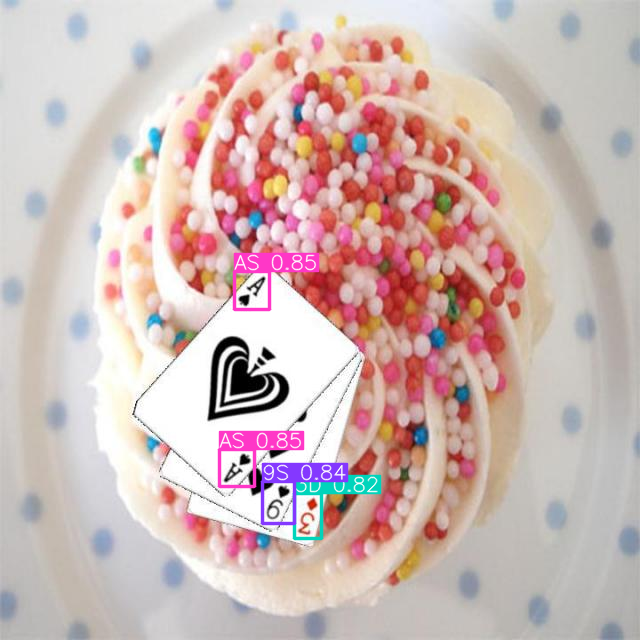

In [4]:
dog = drawboxes('test2.jpg')
Image.fromarray(dog.plot()[:,:,::-1])

In [7]:
model.val(data='data.yaml')

Ultralytics YOLOv8.0.221 🚀 Python-3.10.7 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning E:\studia\2sem\glebokie sieci\valid\labels.cache... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 127/127 [00:22<00:00,  5.63it/s]


                   all       2020       8080      0.999          1      0.995      0.836
                   10C       2020        172      0.999          1      0.995      0.841
                   10D       2020        161      0.999          1      0.995      0.842
                   10H       2020        148      0.999          1      0.995      0.846
                   10S       2020        153      0.999          1      0.995      0.847
                    2C       2020        144      0.999          1      0.995      0.848
                    2D       2020        165      0.999          1      0.995      0.835
                    2H       2020        183      0.999          1      0.995      0.844
                    2S       2020        137          1      0.999      0.995      0.853
                    3C       2020        176      0.999          1      0.995      0.856
                    3D       2020        145      0.999          1      0.995      0.843
                    3

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000025EE9634730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0